In [122]:
import pandas as pd
import numpy as np
import random
from typing import List, Callable
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, minmax_scale, scale
from sklearn.metrics import confusion_matrix, log_loss, mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [102]:
df = pd.read_csv("C:\\Users\\Rohit\\Desktop\\Perturbation Techniques in CNNs\\Perturbation-techniques-in-CNNs\\data\\Iris.csv")

In [103]:
y = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [104]:
Xn = df.iloc[:, 1:5]
Xn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
#try to take values from 0 to 1 - min  to 0 and max to 1 
#X = normalize(X,norm = 'max' ,axis=1)
#Xn = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
#X = minmax_scale(Xn, feature_range=(0, 1), copy=False)
X = scale(Xn)
#X = np.c_[X, np.ones(X.shape[0])]
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

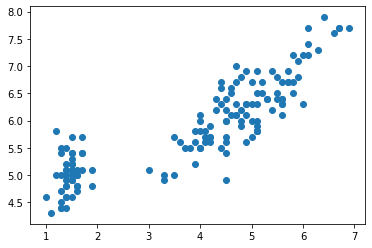

In [106]:
plt.scatter(Xn.iloc[:,2], Xn.iloc[:, 0], cmap='viridis')

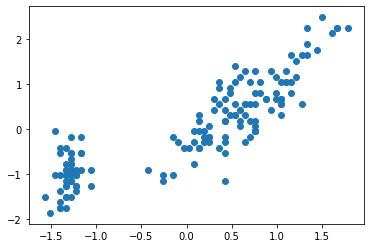

In [107]:
plt.scatter(X[:, 2], X[:, 0], cmap='viridis')

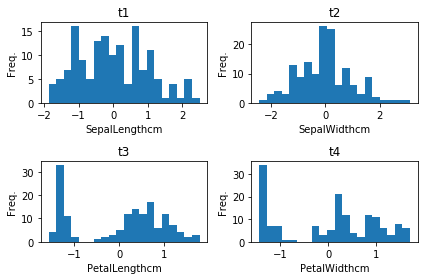

In [123]:
xaxes = ['SepalLengthcm','SepalWidthcm','PetalLengthcm','PetalWidthcm']
yaxes = ['Freq.','Freq.','Freq.','Freq.']
titles = ['t1','t2','t3','t4'] 

f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist((X.T)[idx], bins = 20)
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
plt.tight_layout()

In [ ]:
#!make the ranges same and the frquency axes!!
#!check the weight update with standard BP algo!! the weight uodate might be to big and so it just randomizes the ouput and i the 
#!value is too less that too long for actual update!!!1
#!make a block diagram to show the flow of the ouptuts and values along with the checks and validation for eavh block that u use
#!put each part of the code in a block and each shd have a check for validation!

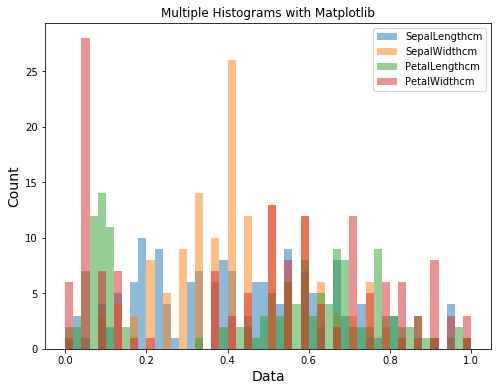

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(X[:, 0], bins=50, alpha=0.5, label="SepalLengthcm");
plt.hist(X[:, 1], bins=50, alpha=0.5, label="SepalWidthcm");
plt.hist(X[:, 2], bins=50, alpha=0.5, label="PetalLengthcm");
plt.hist(X[:, 3], bins=50, alpha=0.5, label="PetalWidthcm");

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#for every class choose a random testing and training subset and then combine so that for ecery class we have the same no 

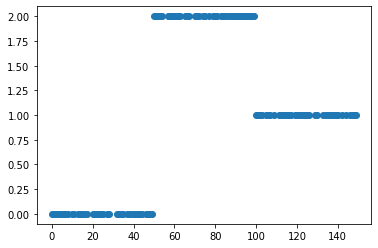

In [110]:
plt.plot(y_train, 'o')

In [148]:
def initialise(neuron_no, H):
  """returns a list containing np arrays of weights at each synpase

  Args:
      neuron_no (list): List of integers which represent the number of neurons at each layer
      H (int): The total depth of the neural network

  Returns:
      List: a list containing np arrays of weights at each synpase
  """
  assert len(neuron_no)==H+1
  W = []
  b = []
  for i in range(0, H):
    W.append(np.random.rand(neuron_no[i], neuron_no[i+1]))
    b.append(np.random.rand(neuron_no[i+1]))
  #for i in range(1, H+1):
  #  b.append(np.random.rand(neuron_no[i],1))
  return np.array(W), np.array(b)

In [112]:
Array_Function = Callable[[np.ndarray], np.ndarray]
# A Chain is a list of functions
Chain = List[Array_Function]

In [113]:
def ForwardPass(chain: Chain, W, b, input : np.ndarray, H) -> np.ndarray:
    z1 = input
    for i in range(0, H):
        activation = chain[i]
        #print(z1.shape, W[i].shape, b[i].shape)
        z1 = np.dot(z1, W[i]) + b[i][None, :]
        a1 = activation(z1)
        z1 = a1
    return z1

In [114]:
def relu(x : np.ndarray) -> np.ndarray:
  return np.maximum(0, x)

In [115]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [ ]:
#def softmax(x : np.ndarray) -> np.ndarray:
#  e_x = np.exp(x - np.max(x))
#  return e_x/e_x.sum(axis = 0)

In [ ]:
#(np.zeros((2,)) + 1)

In [117]:
def softmax_up(x : np.ndarray):
    #soft = []
    #print(x.shape)
    #for i in range(0, x.shape[0]):
    #    e_x = np.exp(x[i, :] - np.max(x[i, :]))
    #    soft.append(e_x/np.sum(np.exp(x[i, :])))
    #return np.array(soft)
    return softmax(x, axis = 1)
#use the library fn to compare!!
#fix !

In [ ]:
np.sum(softmax_up(np.array([[5, 4, 2], [4, 2, 8], [4, 4, 1]]))[:, 1])

0.7497802695323786

In [118]:
def ApplyPert(W, pert, k, i,j):
  W[k][i, j] +=pert
  return W

In [119]:
def ApplyPertBias(b, pert, k, i):
    b[k][i] +=pert
    return b

In [157]:
output = ForwardPass(chain, W, b, X_train, H)
output.shape

(120, 3)

In [159]:
loss = len(y_train)*mean_squared_error(y_train, np.argmax(output, axis = 1))
loss

81.0

In [143]:
def train_my_model(N, H,W, b, epochs:int, chain:Chain, X_train:np.ndarray, y_train, X_test:np.ndarray, y_test, pert, lr, reg_lam):
  #W = initialise(N, H)
  loss_arr = []
  loss_test_arr = []
  acc_arr = []
  acc_test_arr = []
  for i in range(0, epochs):
    print("Training EPoch ---- ", i, " -----")
    output = ForwardPass(chain, W, b, X_train, H)
    #loss = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output) + (reg_lam/(2*len(y_train)))*(np.sum(np.array([np.sum(W[i]**2) for i in range(0, H)])))
    
    #loss = log_loss(y_train, output, labels = y_train)/len(y_train)
    loss = len(y_train)*mean_squared_error(y_train, np.argmax(output, axis = 1))
    loss_arr.append(loss)
    #acc_arr.append(accuracy(np.array(y_train) ,output.argsort(axis = 0)[-1, :]))
    acc_arr.append(np.sum(y_train==np.argmax(output, axis = 1)))
    output_test = ForwardPass(chain, W, b, X_test, H)
    #loss_test_arr.append(cross_entropy(one_hot(np.array(y_test), output.shape[0]), output_test))

    #loss_test_arr.append(log_loss(y_test, output_test, labels = y_test)/len(y_test))
    loss_test_arr.append(mean_squared_error(y_test, np.argmax(output_test, axis = 1)))
    #acc_test_arr.append(accuracy(np.array(y_test) ,output_test.argsort(axis = 0)[-1, :]))
    acc_test_arr.append(np.sum(y_test==np.argmax(output_test, axis = 1)))
    print("Loss epoch ", i, " is = ", loss)
    print("---------------------------------")
    gradients, gradients_bias = initialise(N, H)
    for k in range(0,len(W)):
      for i in range(0, W[k].shape[0]):
        for j in range(0, W[k].shape[1]):
          Dw = ApplyPert(W, pert, k, i, j)
          output_pert = ForwardPass(chain, Dw, b, X_train, H)
          #loss_pert = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output_pert)

          #loss_pert = log_loss(y_train, output_pert, labels = y_train)/len(y_train)
          loss_pert = len(y_train)*mean_squared_error(y_train, np.argmax(output_pert, axis = 1))
          #print("Loss perturned is... ", loss_pert)
          grad = (loss_pert - loss)/pert
          gradients[k][i, j] = grad
    for k in range(0, len(b)):
      for i in range(0, b[k].shape[0]):
        bw = ApplyPertBias(b, pert, k, i)
        output_pert = ForwardPass(chain, W, bw, X_train, H)
          #loss_pert = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output_pert)

        #loss_pert = log_loss(y_train, output_pert, labels = y_train)/len(y_train)
        loss_pert = len(y_train)*mean_squared_error(y_train, np.argmax(output_pert, axis = 1))
        grad = (loss_pert - loss)/pert
        gradients_bias[k][i] = grad
    for i in range(0, len(W)):
      W[i] += (-lr*gradients[i])
      print("---------")
      print("Weight update, ", gradients[i])
      print("---------------")
      #W[i] += (lr*gradients[i])
    for i in range(0, len(b)):
      b[i] += (-lr*gradients_bias[i])
  return loss_arr, acc_arr, acc_test_arr, W, output, loss_test_arr, output

In [145]:
output = ForwardPass(chain, W, b, X_train, H)

In [ ]:
np.sum(np.argmax(output, axis = 1)==0)

135

In [ ]:
np.sum(y_train==np.argmax(output, axis = 1))

44

In [ ]:
#check weigth

In [176]:
N = [4,6, 3]
H = len(N)-1
W, b = initialise(N, H)
chain = [sigmoid,softmax_up]

In [177]:
epochs = 6000
lr = 0.05
delta = 0.1
reg_lam = 0.001

In [174]:
W[1]

array([[38.77885282, 28.99816427, 28.49217154],
       [38.99584909, 28.66412302, 28.72231057],
       [39.09874338, 28.84669842, 28.81039465],
       [39.13255012, 28.41053866, 29.09151208],
       [38.80990928, 29.05004742, 28.44281994],
       [38.97679008, 28.36090629, 28.86667781]])

In [178]:
fin_loss, fin_acc, fin_acc_test, fin_W, fin_op, fin_loss_test, out = train_my_model(N, H,W, b,epochs, chain, X_train, y_train, X_test, y_test, delta, lr, reg_lam);

Training EPoch ----  0  -----
Loss epoch  0  is =  201.0
---------------------------------
---------
Weight update,  [[ 30.  70.  70.  70.  70.  80.]
 [ 80.  80. 110.  80.  80.  80.]
 [110. 110. 110. 110. 110. 150.]
 [150. 150. 150. 150. 150. 150.]]
---------------
---------
Weight update,  [[150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]]
---------------
Training EPoch ----  1  -----
Loss epoch  1  is =  203.0
---------------------------------
---------
Weight update,  [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
---------------
---------
Weight update,  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
---------------
Training EPoch ----  2  -----
Loss epoch  2  is =  203.0
---------------------------------
---------
Weight update,  [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
---------------
---------
Weight update,  [[0. 0

KeyboardInterrupt: 

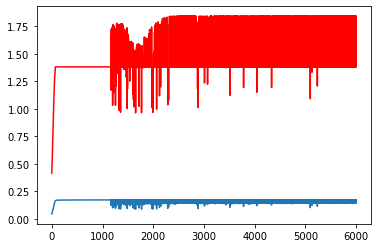

In [ ]:
x = np.arange(epochs)
plt.plot(x, fin_loss)
plt.plot(x, fin_loss_test, "r")

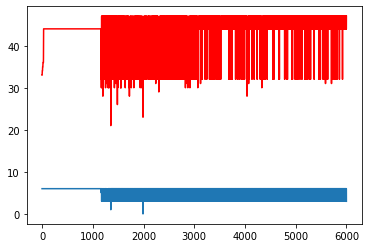

In [ ]:
plt.plot(x, fin_acc, "r")
plt.plot(x, fin_acc_test)

In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def weight_perturbation(self, output_error, learning_rate):
        raise NotImplementedError

In [ ]:
#from layer import Layer
import numpy as np

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error